In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/sample_data/user_behavior_dataset.csv')

# Calculate average metrics for iOS vs Android
os_comparison = df.groupby('Operating System').agg({
    'App Usage Time (min/day)': 'mean',
    'Screen On Time (hours/day)': 'mean',
    'Battery Drain (mAh/day)': 'mean',
    'Data Usage (MB/day)': 'mean'
}).round(2)

print("\
Average Usage Metrics by Operating System:")
print(os_comparison)

df['Age_Group'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 100], labels=['<20', '20-30', '30-40', '40-50', '50+'])

# Calculate average metrics by age group
age_metrics = df.groupby('Age_Group').agg({
    'App Usage Time (min/day)': 'mean',
    'Screen On Time (hours/day)': 'mean',
    'Battery Drain (mAh/day)': 'mean',
    'Data Usage (MB/day)': 'mean'
}).round(2)

print("\nAverage Usage Metrics by Age Group:")
print(age_metrics)

Average Usage Metrics by Operating System:
                  App Usage Time (min/day)  Screen On Time (hours/day)  \
Operating System                                                         
Android                             268.26                        5.23   
iOS                                 282.02                        5.43   

                  Battery Drain (mAh/day)  Data Usage (MB/day)  
Operating System                                                
Android                           1508.20               920.32  
iOS                               1589.51               965.51  

Average Usage Metrics by Age Group:
           App Usage Time (min/day)  Screen On Time (hours/day)  \
Age_Group                                                         
<20                          267.42                        5.29   
20-30                        265.39                        5.11   
30-40                        277.12                        5.35   
40-50                       

<ipython-input-1-eba98d8a320d>:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_metrics = df.groupby('Age_Group').agg({


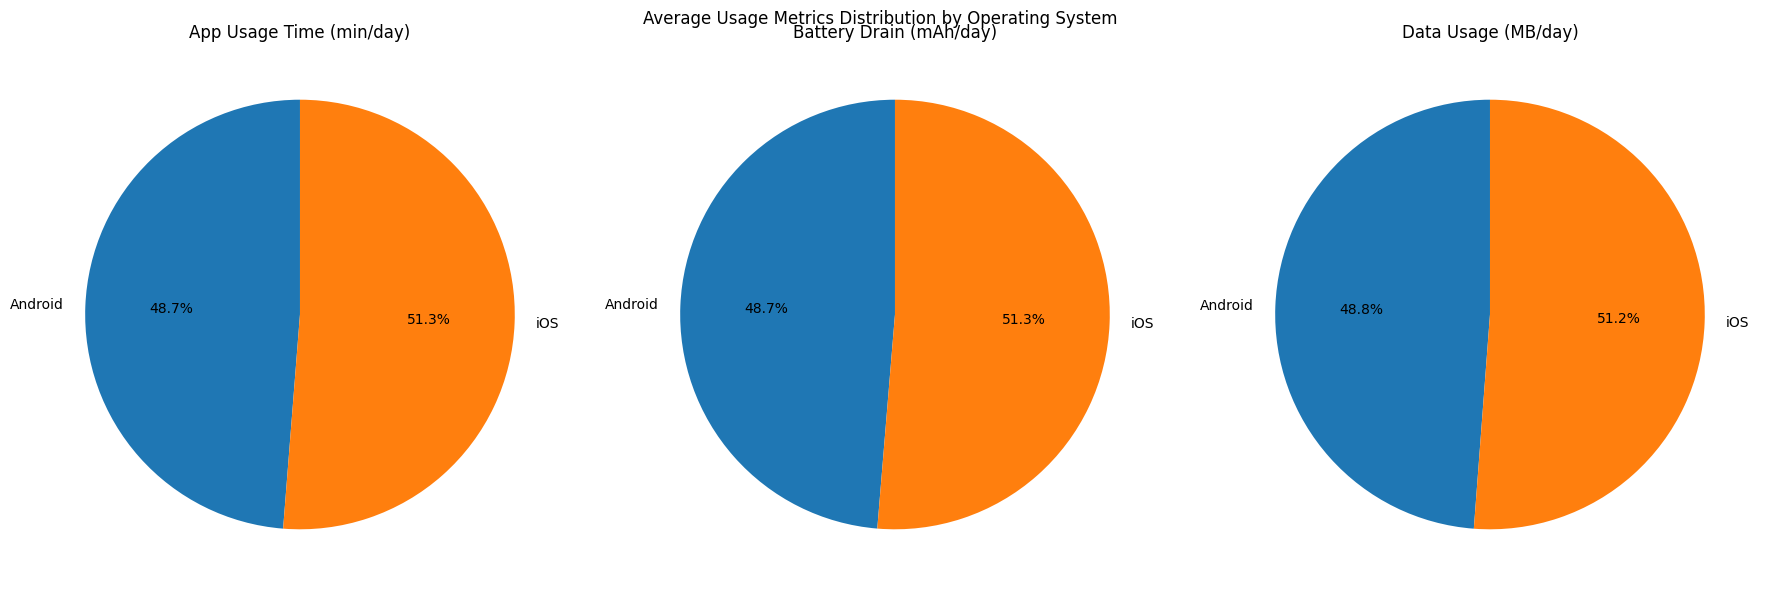

Number of users by OS:
Operating System
Android    554
iOS        146
Name: count, dtype: int64


In [2]:
metrics = ['App Usage Time (min/day)', 'Battery Drain (mAh/day)', 'Data Usage (MB/day)']
os_means = df.groupby('Operating System')[metrics].mean()

# Create subplots for each metric
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Average Usage Metrics Distribution by Operating System')

for i, metric in enumerate(metrics):
    axes[i].pie(os_means[metric], labels=os_means.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(metric)

plt.tight_layout()
plt.show()

print("\
Number of users by OS:")
print(df['Operating System'].value_counts())

<ipython-input-3-152fbb940f74>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_means = df.groupby('Age_Group')[metrics].mean()


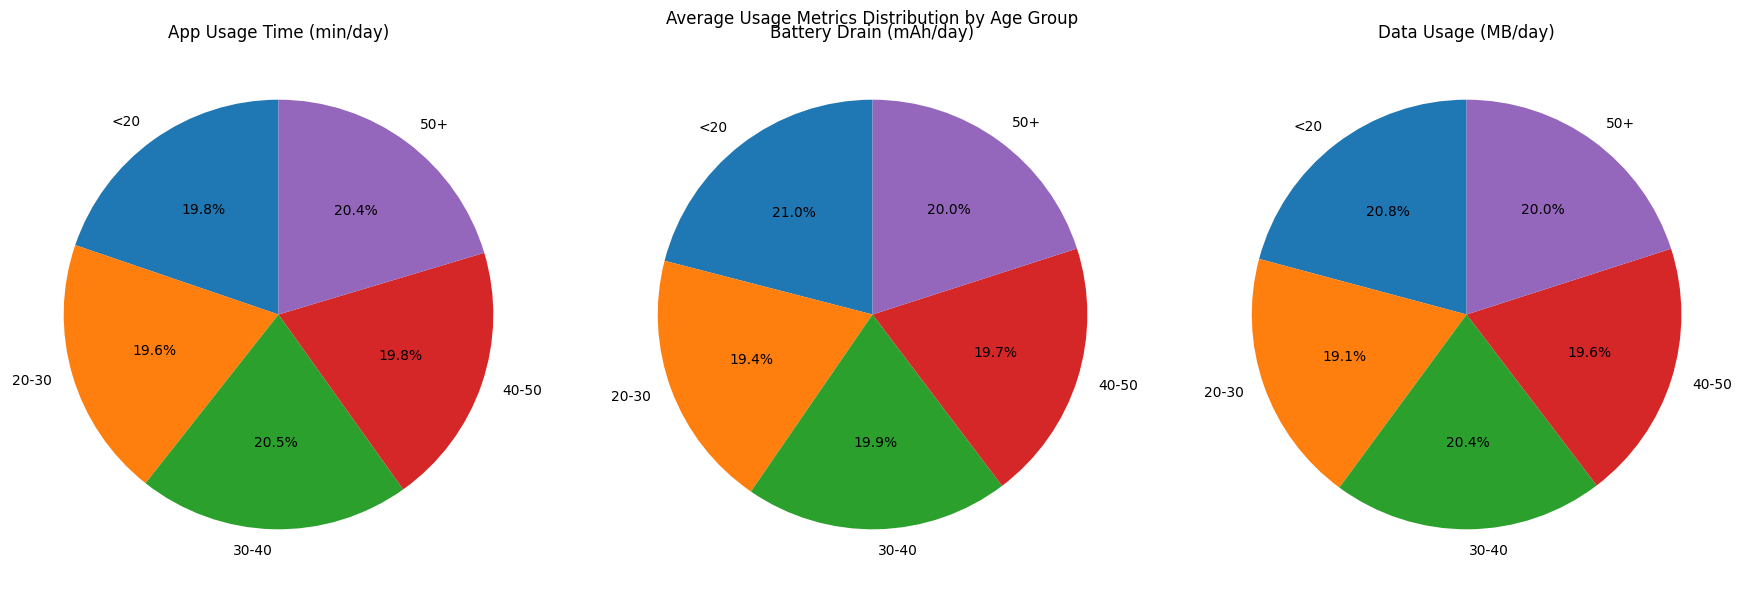

In [3]:
# Create age groups
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 100], labels=['<20', '20-30', '30-40', '40-50', '50+'])

# Calculate average metrics for each age group
age_means = df.groupby('Age_Group')[metrics].mean()

# Plot pie charts for each metric
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Average Usage Metrics Distribution by Age Group')

for i, metric in enumerate(metrics):
    axes[i].pie(age_means[metric], labels=age_means.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(metric)

plt.tight_layout()
plt.show()